# Data Analysis

### Load data

In [1]:
# Import the libraries
import os
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Read the parameters
with open("../params.yaml", 'r') as f:
    config = yaml.safe_load(f)

In [3]:
# Get the dataframe
data_path = os.path.join("../", config['data_source']['data_source_path'])
df = pd.read_csv(data_path, sep=",", encoding="utf-8")

<br>

### Statistical information

In [4]:
# Get the shape of the dataframe
df.shape

(374, 13)

In [5]:
# Display the headers
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [6]:
# Check for missing values
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
# Check for duplicate rows
df.duplicated().sum()

0

In [8]:
# Display the top 5 rows of the dataframe
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [9]:
# Describe the number of non-null values and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [10]:
# Describe numerical data
df.describe().T

count         mean          std     min      25%  \
Person ID                374.0   187.500000   108.108742     1.0    94.25   
Age                      374.0    42.184492     8.673133    27.0    35.25   
Sleep Duration           374.0     7.132086     0.795657     5.8     6.40   
Quality of Sleep         374.0     7.312834     1.196956     4.0     6.00   
Physical Activity Level  374.0    59.171123    20.830804    30.0    45.00   
Stress Level             374.0     5.385027     1.774526     3.0     4.00   
Heart Rate               374.0    70.165775     4.135676    65.0    68.00   
Daily Steps              374.0  6816.844920  1617.915679  3000.0  5600.00   

                            50%      75%      max  
Person ID                 187.5   280.75    374.0  
Age                        43.0    50.00     59.0  
Sleep Duration              7.2     7.80      8.5  
Quality of Sleep            7.0     8.00      9.0  
Physical Activity Level    60.0    75.00     90.0  
Stress Level                5.0     7.00      8.0  
Heart Rate                 70.0    72.00     86.0  
Daily Steps              7000.0  8000.00  10000.0

In [11]:
# Describe categorical statistics
df.astype('object').describe()

Person ID Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
count         374    374  374        374           374.0               374   
unique        374      2   31         11            27.0                 6   
top             1   Male   43      Nurse             7.2                 8   
freq            1    189   34         73            36.0               109   

        Physical Activity Level  Stress Level BMI Category Blood Pressure  \
count                       374           374          374            374   
unique                       16             6            4             25   
top                          60             3       Normal         130/85   
freq                         70            71          195             99   

        Heart Rate  Daily Steps Sleep Disorder  
count          374          374            155  
unique          19           20              2  
top             68         8000    Sleep Apnea  
freq            94          101             78

##### __Inference:__
* We have 374 rows and 13 columns
* There are No Missing values present
* There are No Duplicate rows
* Sleep Disorder Column is the TARGET
* Person ID column can be disregarded
* Blood Pressure Column seems like a categorical data but actually contains numerical data
* Except Sleep Disorder Column all other columns have non-null values. However the non-null values of Sleep Disorder column is suppposed to be considered as Normal or No disorder.
<br>
- Numerical data Columns: Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Blood Pressure, Heart Rate, Daily Steps
- Categorical data Columns: Gender, Occupation, BMI Category, Sleep Disorder

<br>

### Preprocess data based on Inference

In [12]:
# Drop the Personal ID column
df = df.drop('Person ID', axis=1)

In [13]:
# Change Blood Pressure column from categorical to numerical
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)

# Rename the colummn and convert the datatype from object to int64
df = df.rename(columns={0: 'Blood Pressure High', 1: 'Blood Pressure Low'})
df[['Blood Pressure High', 'Blood Pressure Low']] = df[['Blood Pressure High', 'Blood Pressure Low']].apply(pd.to_numeric)

In [14]:
# Replace NaN with None in Sleep Disorder Target column
df.loc[df['Sleep Disorder'].isna(), 'Sleep Disorder'] = "Normal"

In [15]:
# Rename column names
new_cols = [col.replace(" ", "_") for col in df.columns]
df.columns = new_cols

In [16]:
# Move the target column to the end
df.insert(len(df.columns)-1, 'Sleep_Disorder', df.pop('Sleep_Disorder'))

In [17]:
df

Gender  Age            Occupation  Sleep_Duration  Quality_of_Sleep  \
0      Male   27     Software Engineer             6.1                 6   
1      Male   28                Doctor             6.2                 6   
2      Male   28                Doctor             6.2                 6   
3      Male   28  Sales Representative             5.9                 4   
4      Male   28  Sales Representative             5.9                 4   
..      ...  ...                   ...             ...               ...   
369  Female   59                 Nurse             8.1                 9   
370  Female   59                 Nurse             8.0                 9   
371  Female   59                 Nurse             8.1                 9   
372  Female   59                 Nurse             8.1                 9   
373  Female   59                 Nurse             8.1                 9   

     Physical_Activity_Level  Stress_Level BMI_Category  Heart_Rate  \
0                         42             6   Overweight          77   
1                         60             8       Normal          75   
2                         60             8       Normal          75   
3                         30             8        Obese          85   
4                         30             8        Obese          85   
..                       ...           ...          ...         ...   
369                       75             3   Overweight          68   
370                       75             3   Overweight          68   
371                       75             3   Overweight          68   
372                       75             3   Overweight          68   
373                       75             3   Overweight          68   

     Daily_Steps  Blood_Pressure_High  Blood_Pressure_Low Sleep_Disorder  
0           4200                  126                  83         Normal  
1          10000                  125                  80         Normal  
2          10000                  125                  80         Normal  
3           3000                  140                  90    Sleep Apnea  
4           3000                  140                  90    Sleep Apnea  
..           ...                  ...                 ...            ...  
369         7000                  140                  95    Sleep Apnea  
370         7000                  140                  95    Sleep Apnea  
371         7000                  140                  95    Sleep Apnea  
372         7000                  140                  95    Sleep Apnea  
373         7000                  140                  95    Sleep Apnea  

[374 rows x 13 columns]

<br>

### Exploratory Data Analysis

In [18]:
# Display the unique categorical values
print(f"Gender : {df['Gender'].unique()}")
print(f"Occupation : {df['Occupation'].unique()}")
print(f"BMI_Category : {df['BMI_Category'].unique()}")
print(f"Sleep_Disorder : {df['Sleep_Disorder'].unique()}")

Gender : ['Male' 'Female']
Occupation : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI_Category : ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Sleep_Disorder : ['Normal' 'Sleep Apnea' 'Insomnia']


In [19]:
df.groupby('Gender')['Sleep_Disorder'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Gender  Sleep_Disorder
Female  Normal            44.32%
        Sleep Apnea       36.22%
        Insomnia          19.46%
Male    Normal            72.49%
        Insomnia          21.69%
        Sleep Apnea        5.82%
Name: proportion, dtype: object

In [20]:
df.groupby('BMI_Category')['Sleep_Disorder'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

BMI_Category   Sleep_Disorder
Normal         Normal            93.85%
               Insomnia           3.59%
               Sleep Apnea        2.56%
Normal Weight  Normal            80.95%
               Insomnia           9.52%
               Sleep Apnea        9.52%
Obese          Sleep Apnea        60.0%
               Insomnia           40.0%
Overweight     Sleep Apnea       43.92%
               Insomnia          43.24%
               Normal            12.84%
Name: proportion, dtype: object

In [21]:
df_numerical = df.drop(['Gender', 'Occupation', 'BMI_Category', 'Sleep_Disorder'], axis=1)

<Axes: >

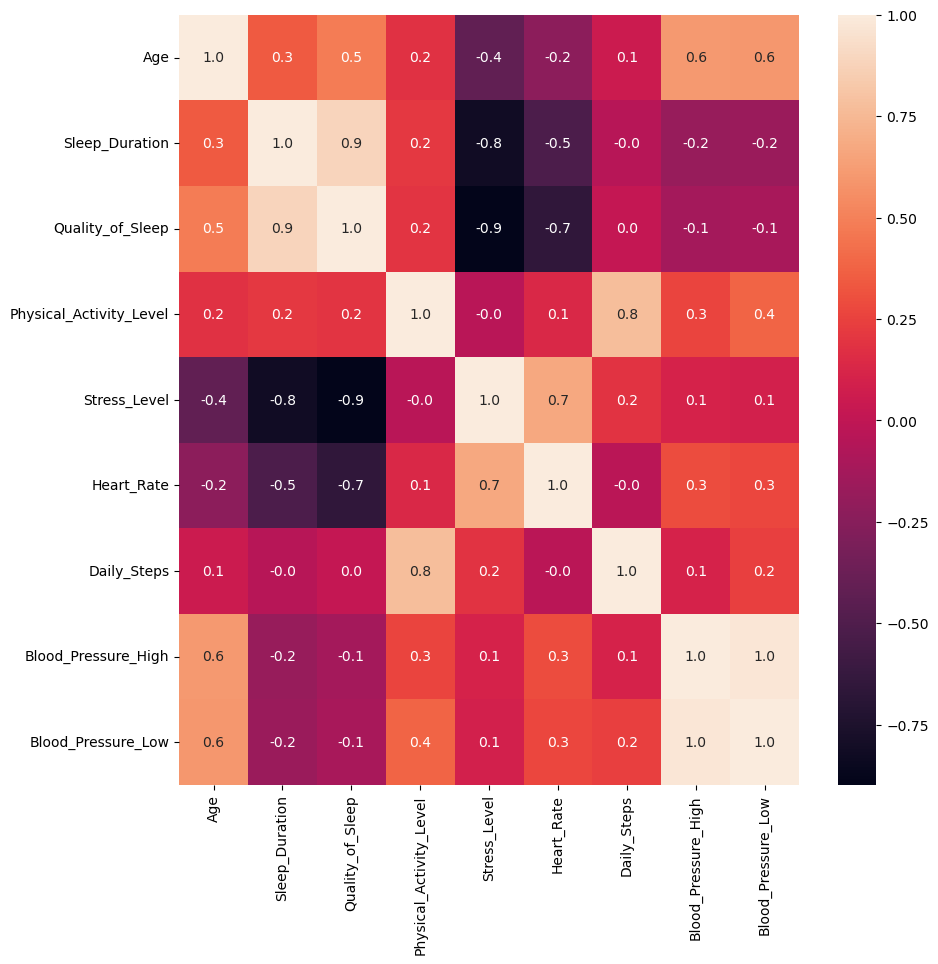

In [22]:
# Plot the Correlation heatmap of the numerical data
plt.figure(figsize=(10,10))
sns.heatmap(df_numerical.corr(),annot=True,fmt="1.1f")

C:\Users\rajar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


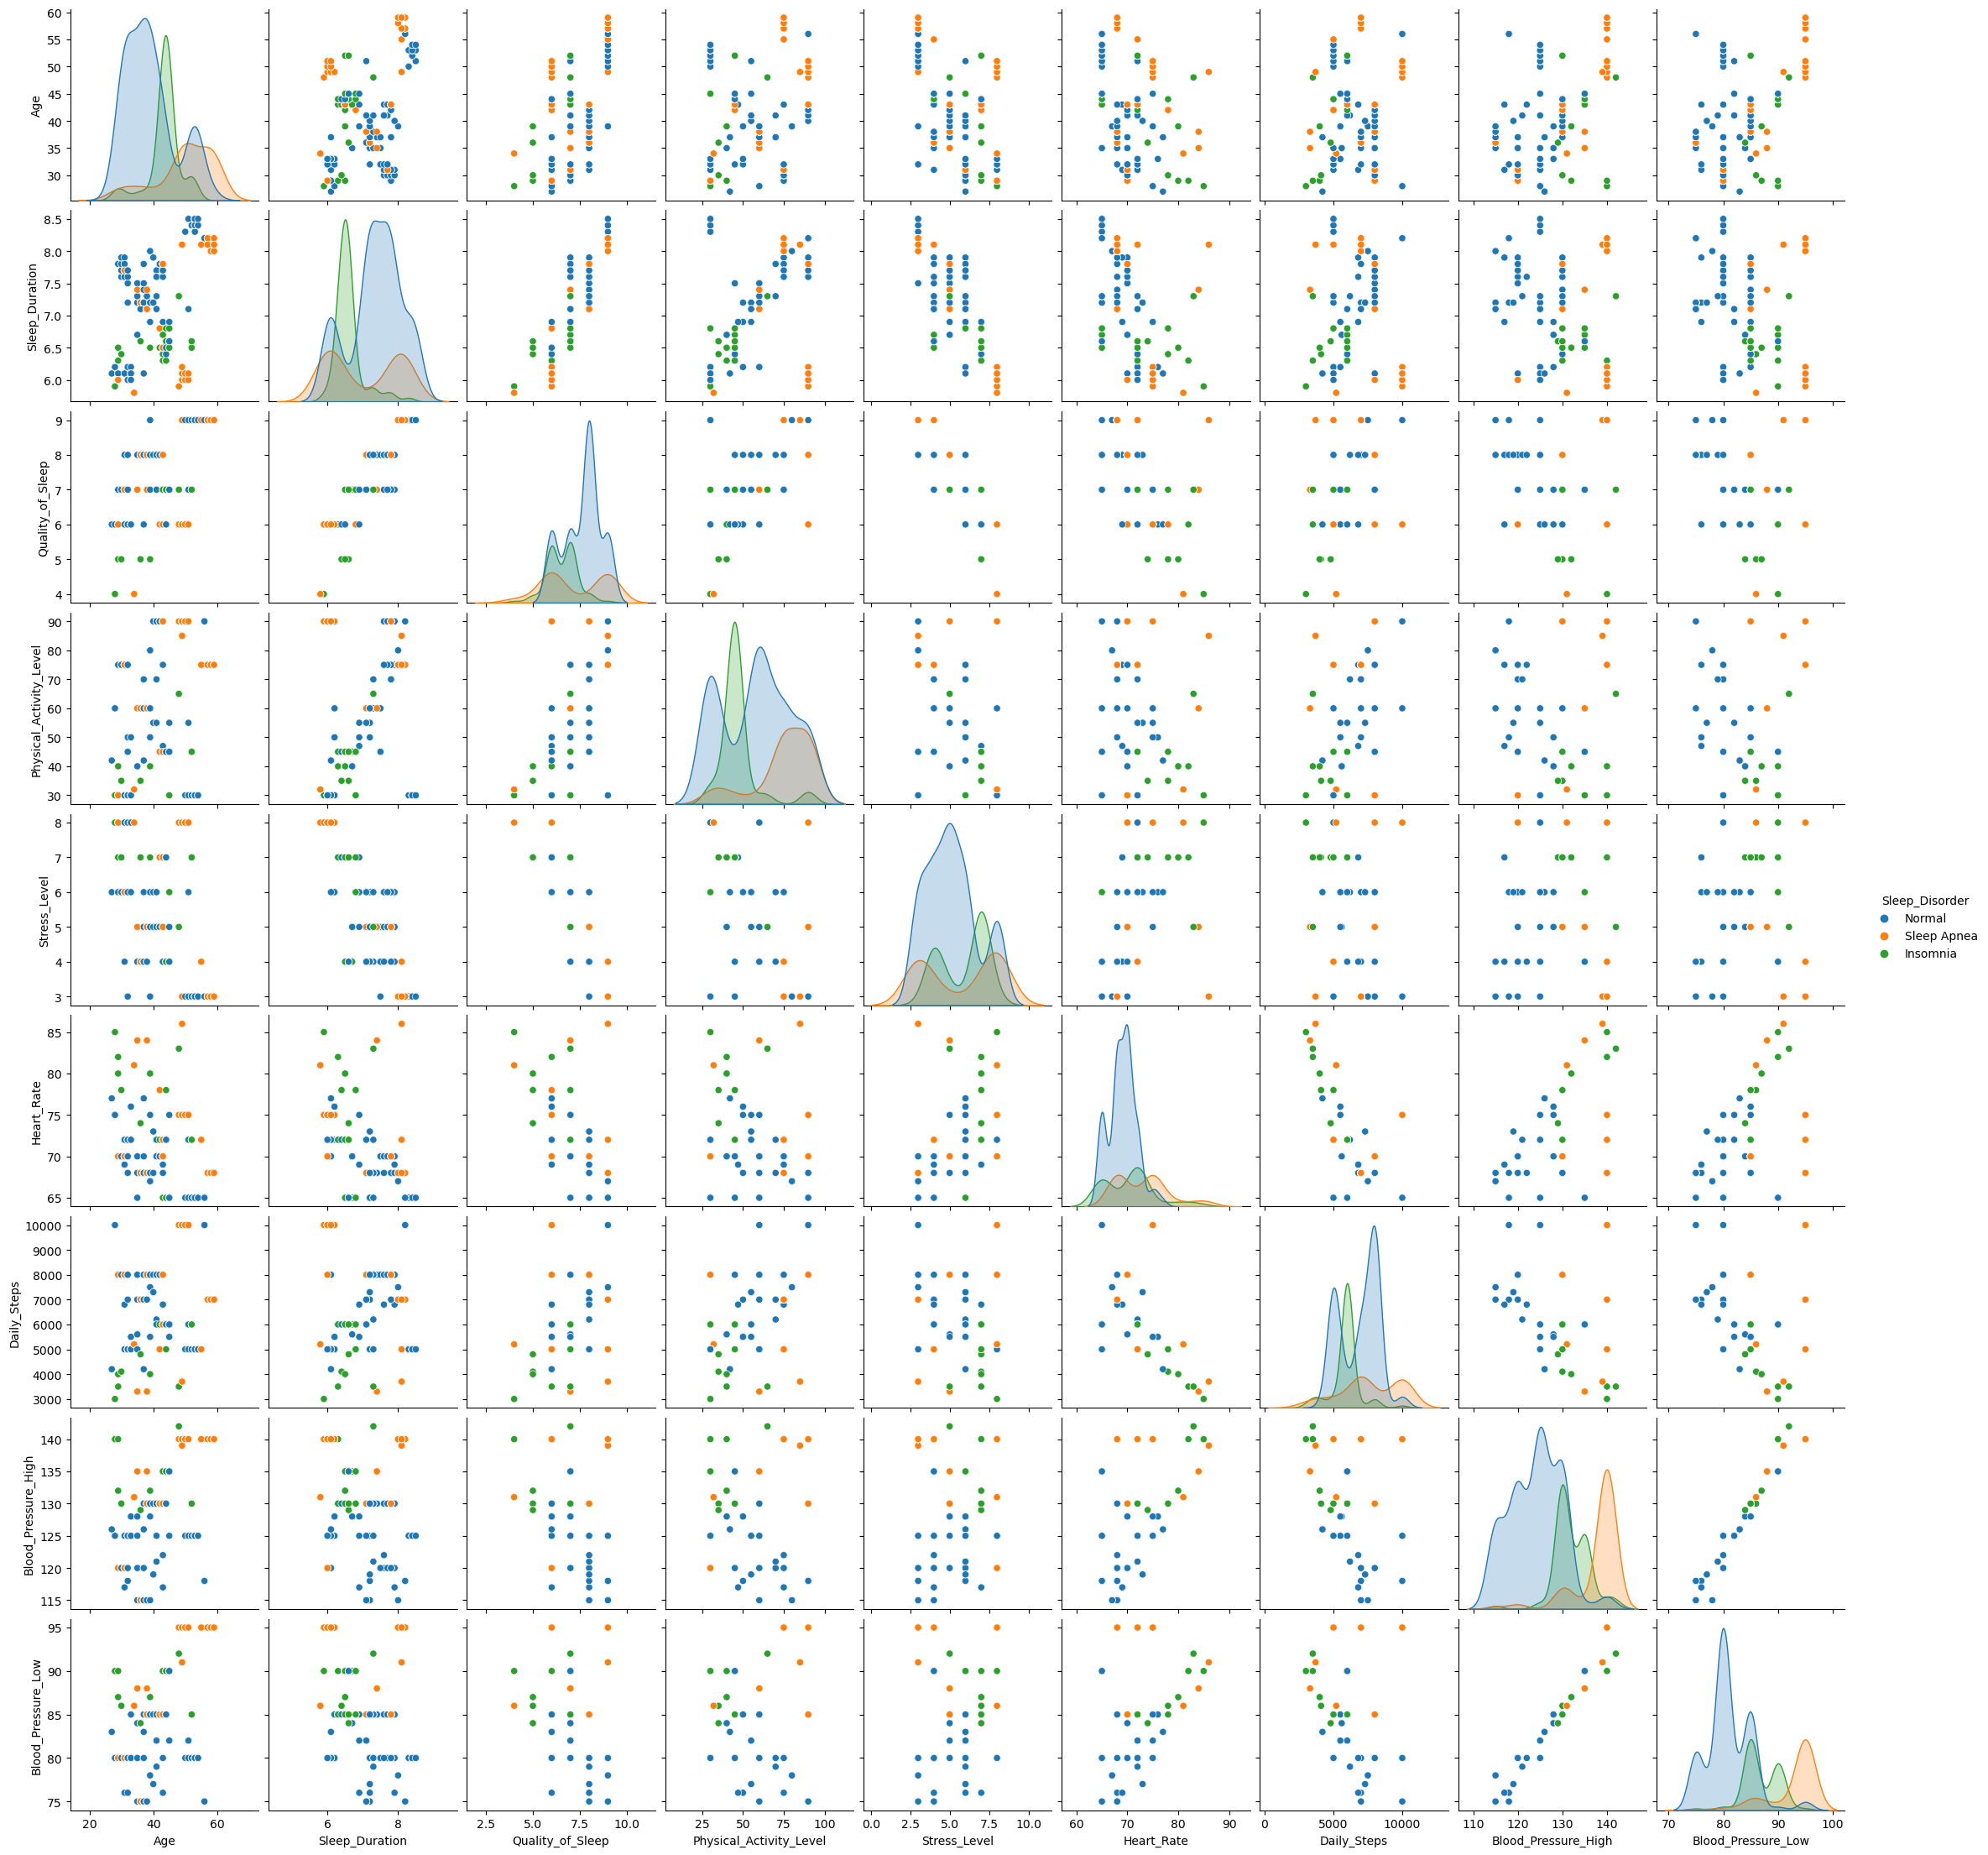

In [23]:
# Plot Pairplot based on Sleep Disorder
sns.pairplot(df, hue = 'Sleep_Disorder')

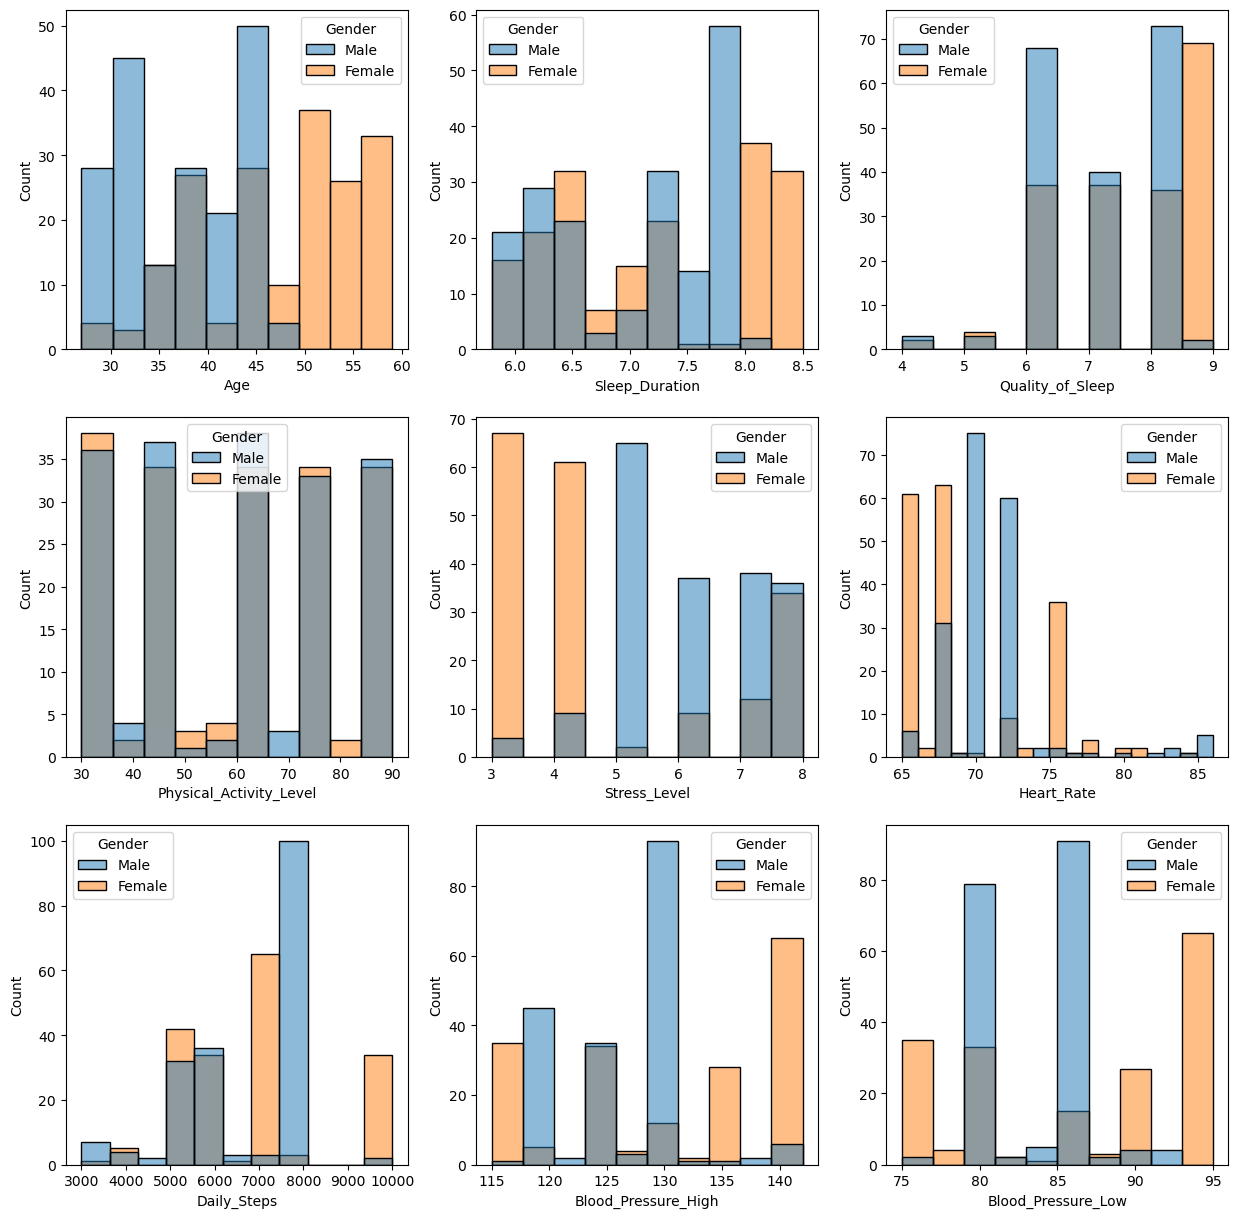

In [24]:
# Plot histplot based on Sleep Disorder
columns = df_numerical.columns
fig = plt.figure(figsize=(15,15))

for i in range(len(columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=df[columns[i]], hue='Gender')
    
plt.show()

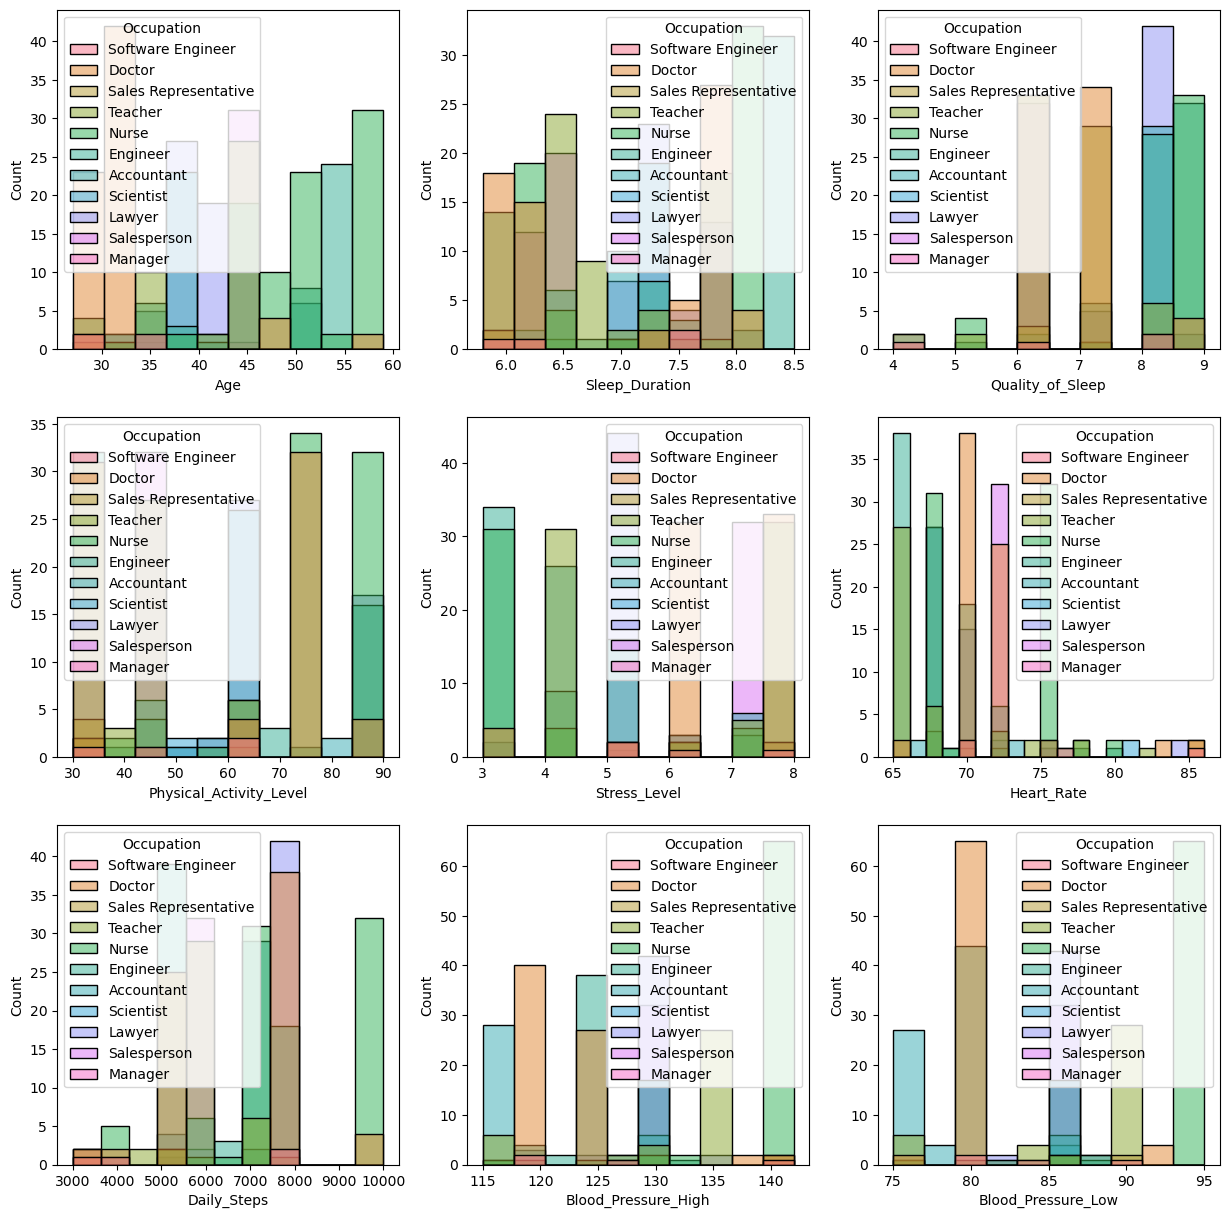

In [25]:
# Plot histplot based on Sleep Disorder
columns = df_numerical.columns
fig = plt.figure(figsize=(15,15))

for i in range(len(columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=df[columns[i]], hue='Occupation')
    
plt.show()

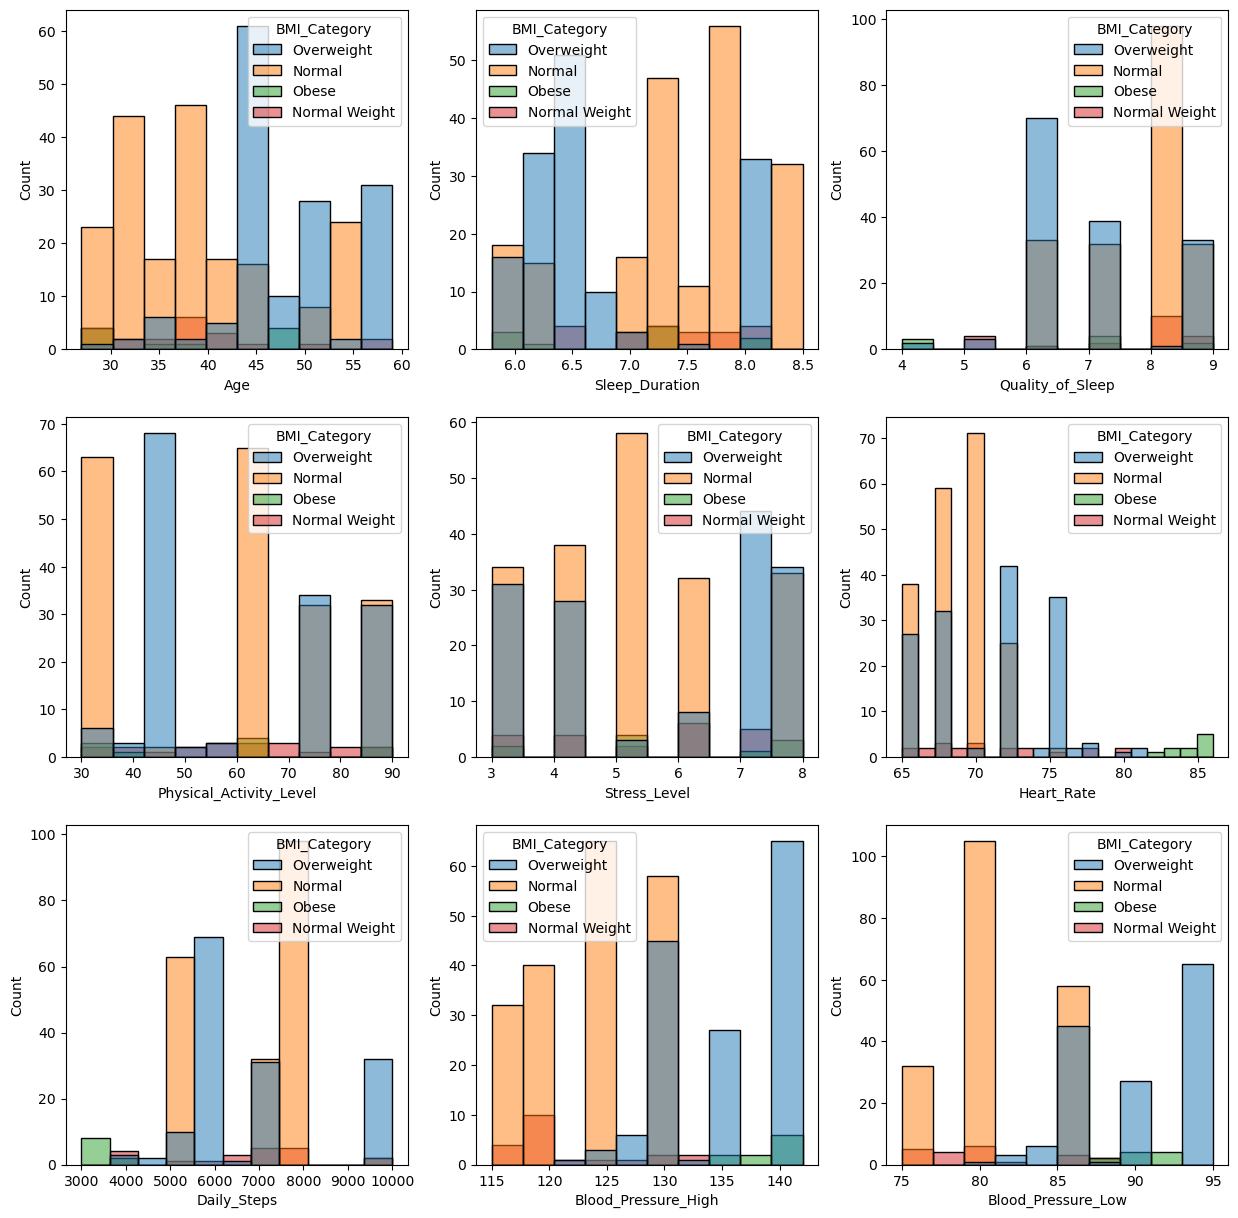

In [26]:
# Plot histplot based on Sleep Disorder
columns = df_numerical.columns
fig = plt.figure(figsize=(15,15))

for i in range(len(columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=df[columns[i]], hue='BMI_Category')
    
plt.show()

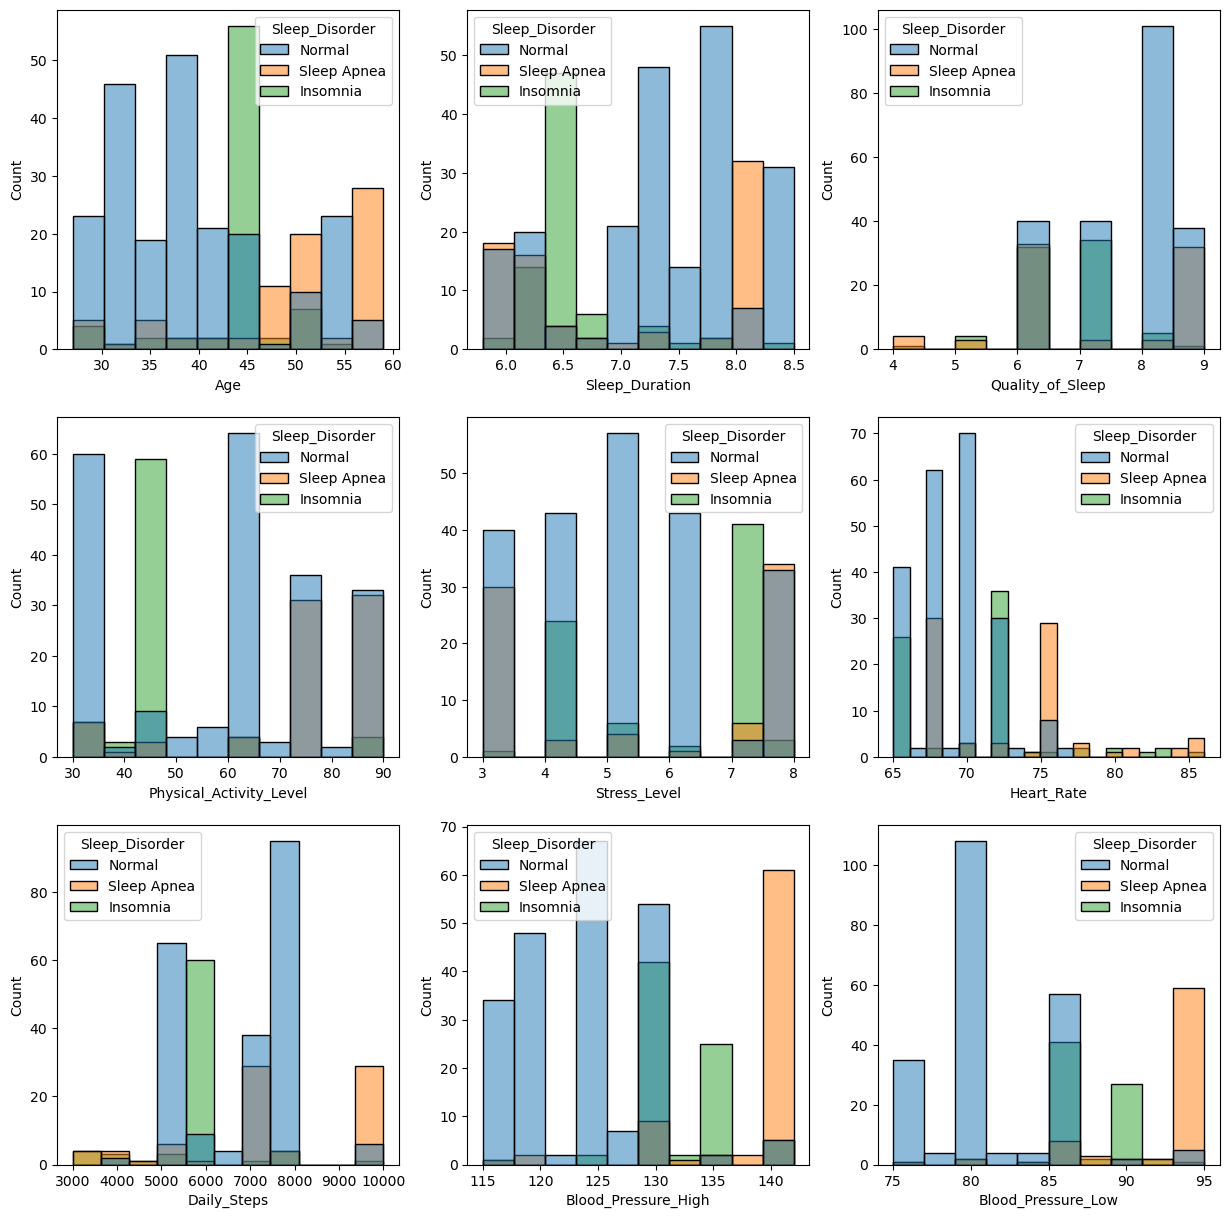

In [27]:
# Plot histplot based on Sleep Disorder
columns = df_numerical.columns
fig = plt.figure(figsize=(15,15))

for i in range(len(columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=df[columns[i]], hue='Sleep_Disorder')
    
plt.show()

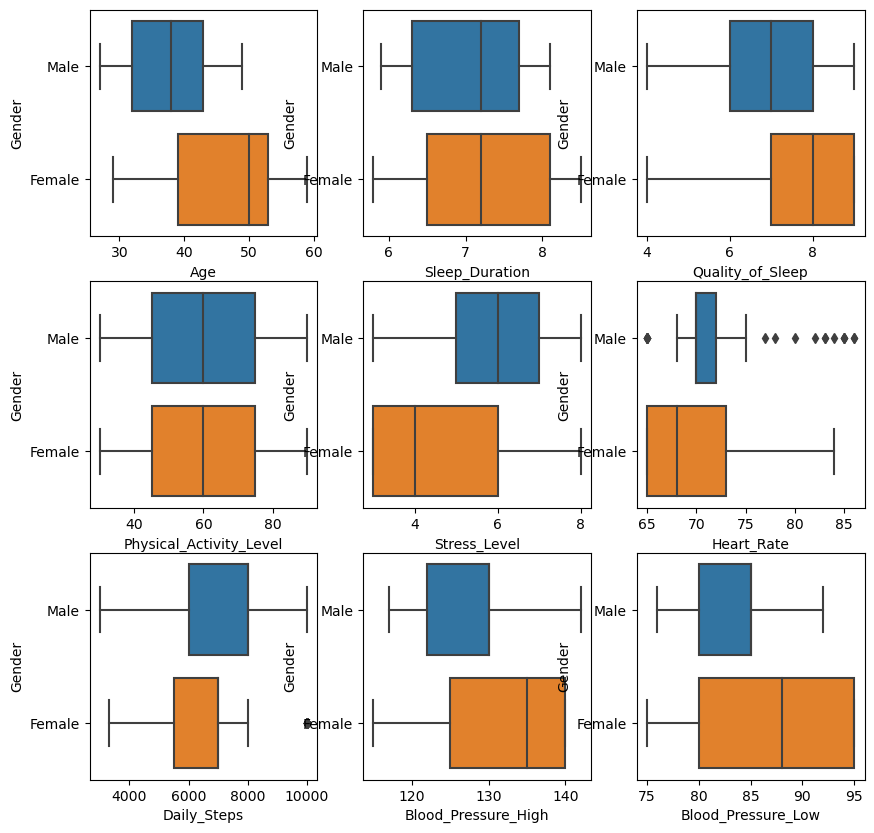

In [28]:
# Boxplot based on Gender
fig = plt.figure(figsize=(10,10))

for i in range(len(columns)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=df[columns[i]], y=df['Gender'])

plt.show()

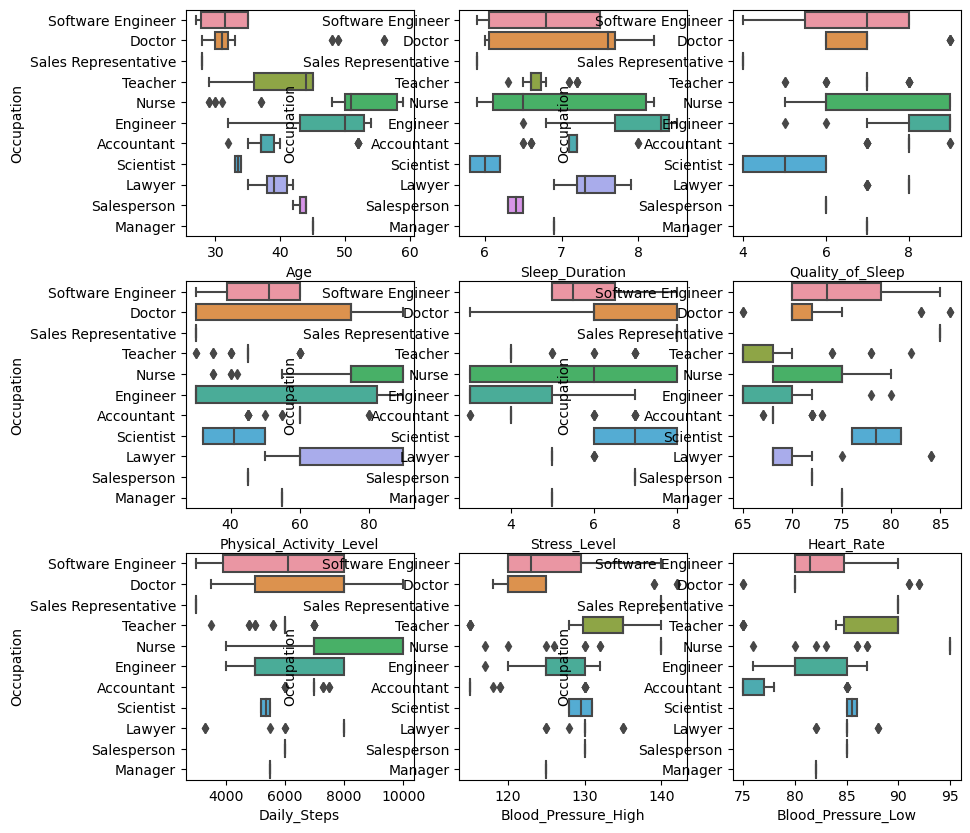

In [29]:
# Boxplot based on Occupation
fig = plt.figure(figsize=(10,10))

for i in range(len(columns)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=df[columns[i]], y=df['Occupation'])

plt.show()

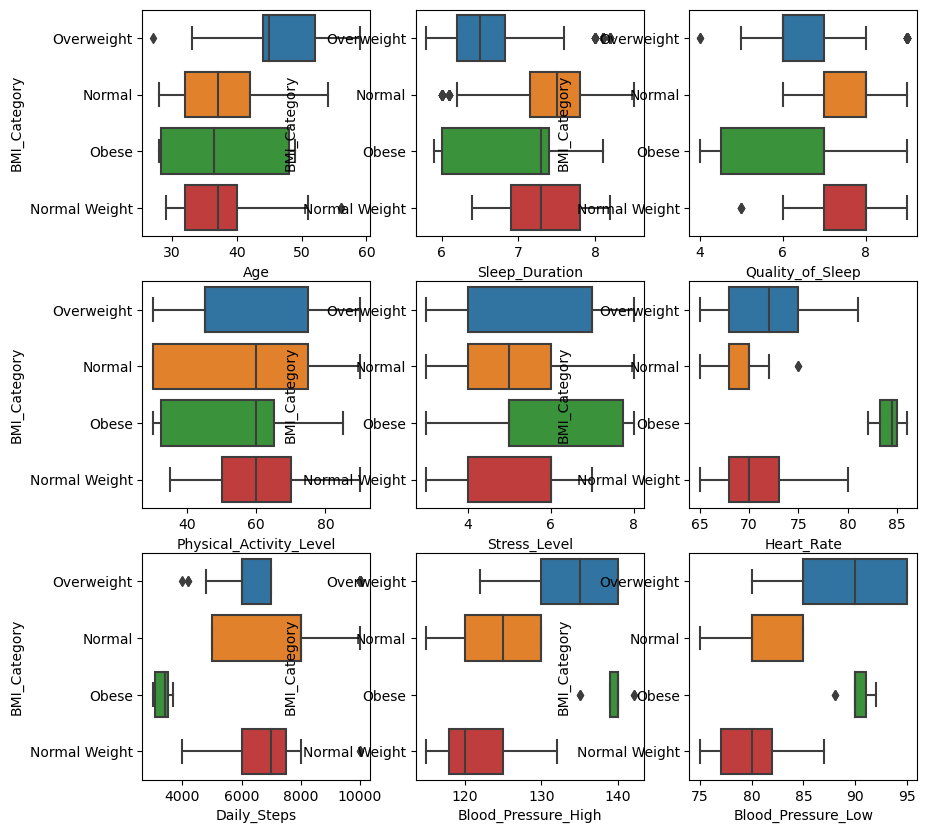

In [30]:
# Boxplot based on BMI Category
fig = plt.figure(figsize=(10,10))

for i in range(len(columns)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=df[columns[i]], y=df['BMI_Category'])

plt.show()

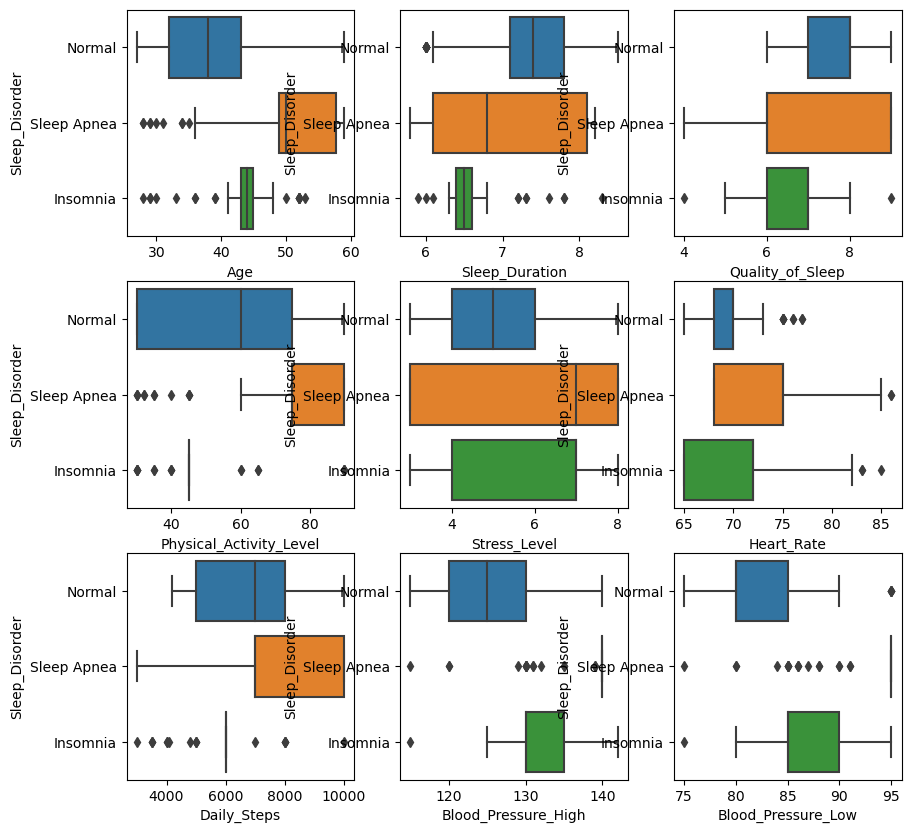

In [31]:
# Boxplot based on Sleep Disorder
fig = plt.figure(figsize=(10,10))

for i in range(len(columns)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x=df[columns[i]], y=df['Sleep_Disorder'])

plt.show()

In [32]:
# Display trhe Target distribution
df['Sleep_Disorder'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

Sleep_Disorder
Normal         58.56%
Sleep Apnea    20.86%
Insomnia       20.59%
Name: proportion, dtype: object

Text(0.5, 1.0, 'Sleep Disorder Histogram')

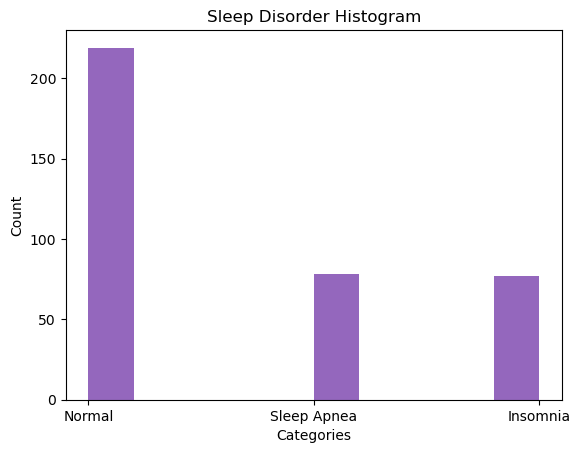

In [33]:
# Plot the Target distribution
plt.hist(df['Sleep_Disorder'], color="tab:purple")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Sleep Disorder Histogram")

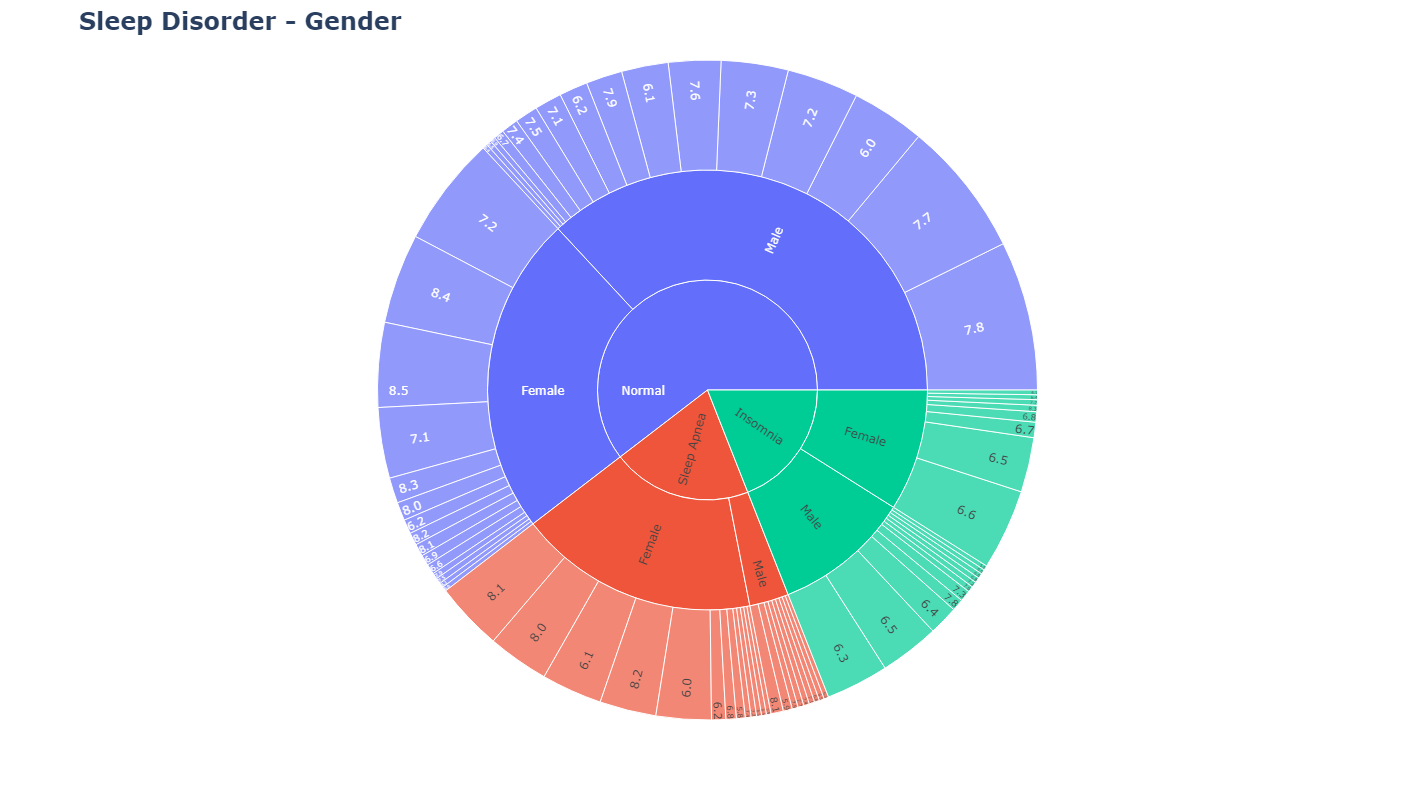

In [34]:
# Sunburst plot based on Gender
fig = px.sunburst(df, path=['Sleep_Disorder', 'Gender', 'Sleep_Duration'], color='Sleep_Disorder', values='Sleep_Duration')
fig.update_layout(title='<b> Sleep Disorder - Gender </b>', title_font={'size':24}, autosize=False, width=800, height=800)
fig.update_traces(insidetextorientation='radial')

fig.show()

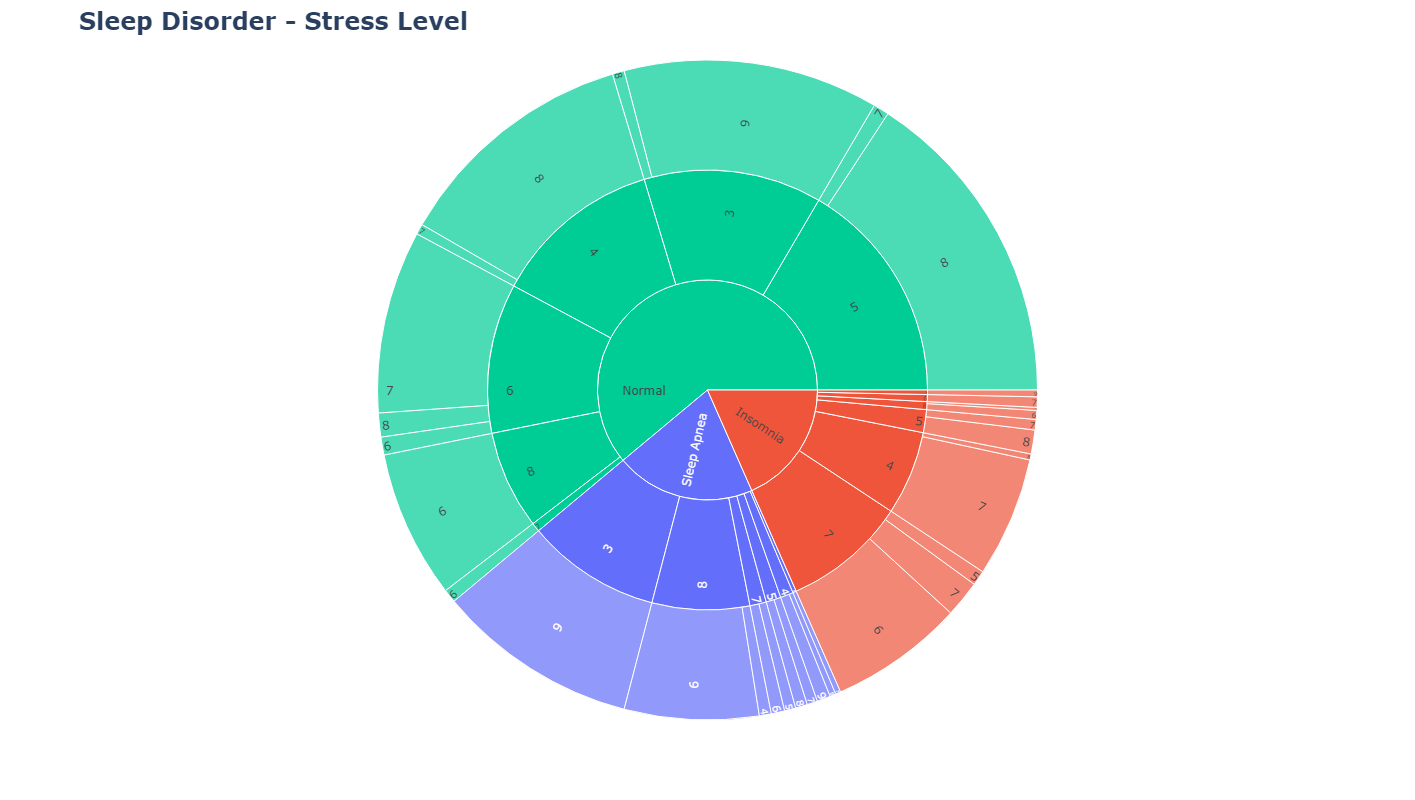

In [35]:
# Sunburst plot based on Stress Level
fig = px.sunburst(df, path=['Sleep_Disorder', 'Stress_Level', 'Quality_of_Sleep'], color='Sleep_Disorder', values='Quality_of_Sleep')
fig.update_layout(title='<b> Sleep Disorder - Stress Level </b>', title_font={'size':24}, autosize=False, width=800, height=800)
fig.update_traces(insidetextorientation='radial')

fig.show()

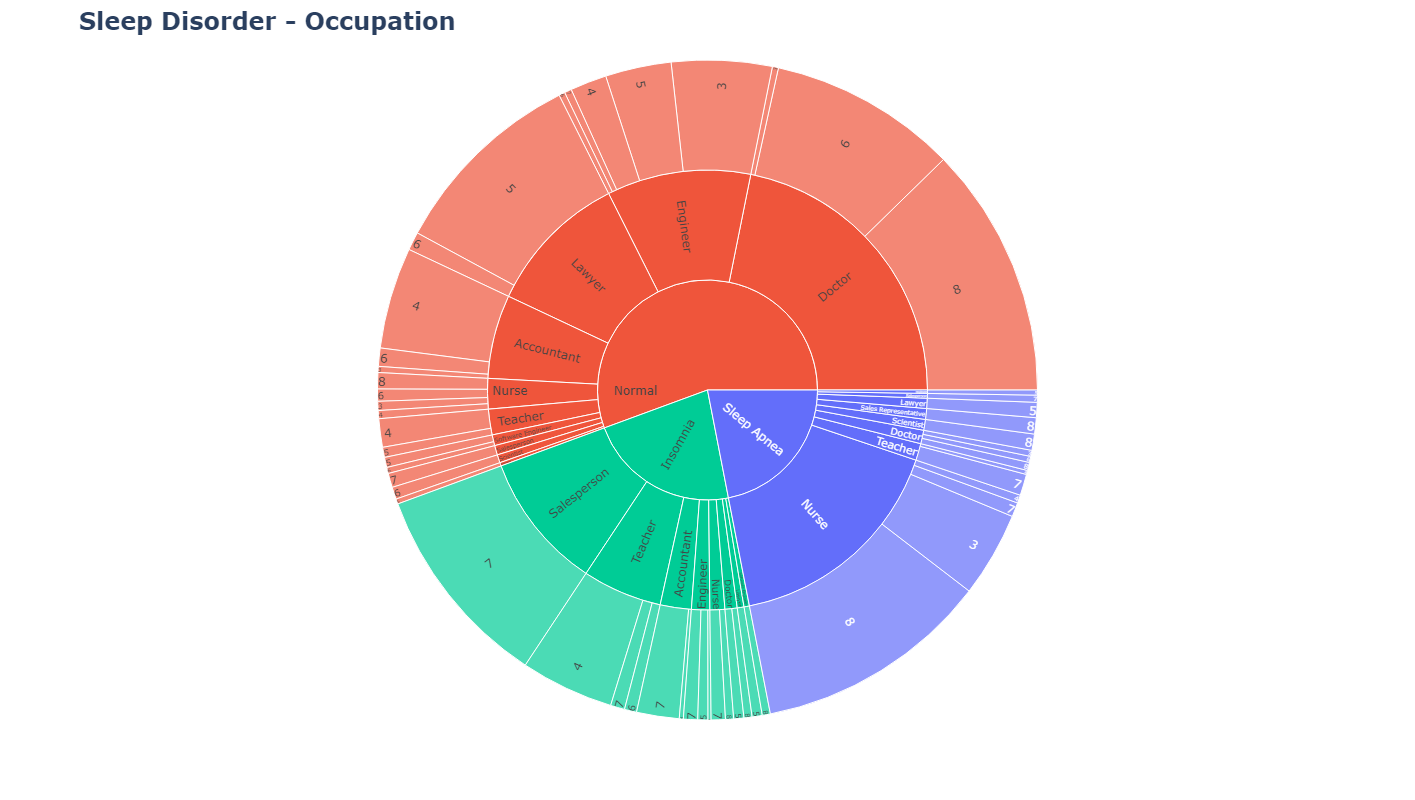

In [36]:
# Sunburst plot based on Occupation
fig = px.sunburst(df, path=['Sleep_Disorder', 'Occupation', 'Stress_Level'], color='Sleep_Disorder', values='Stress_Level')
fig.update_layout(title='<b> Sleep Disorder - Occupation </b>', title_font={'size':24}, autosize=False, width=800, height=800)
fig.update_traces(hovertemplate="%{label} <br>%{value:.1f} tCO\u2082e <extra></extra>", insidetextorientation='radial')

fig.show()

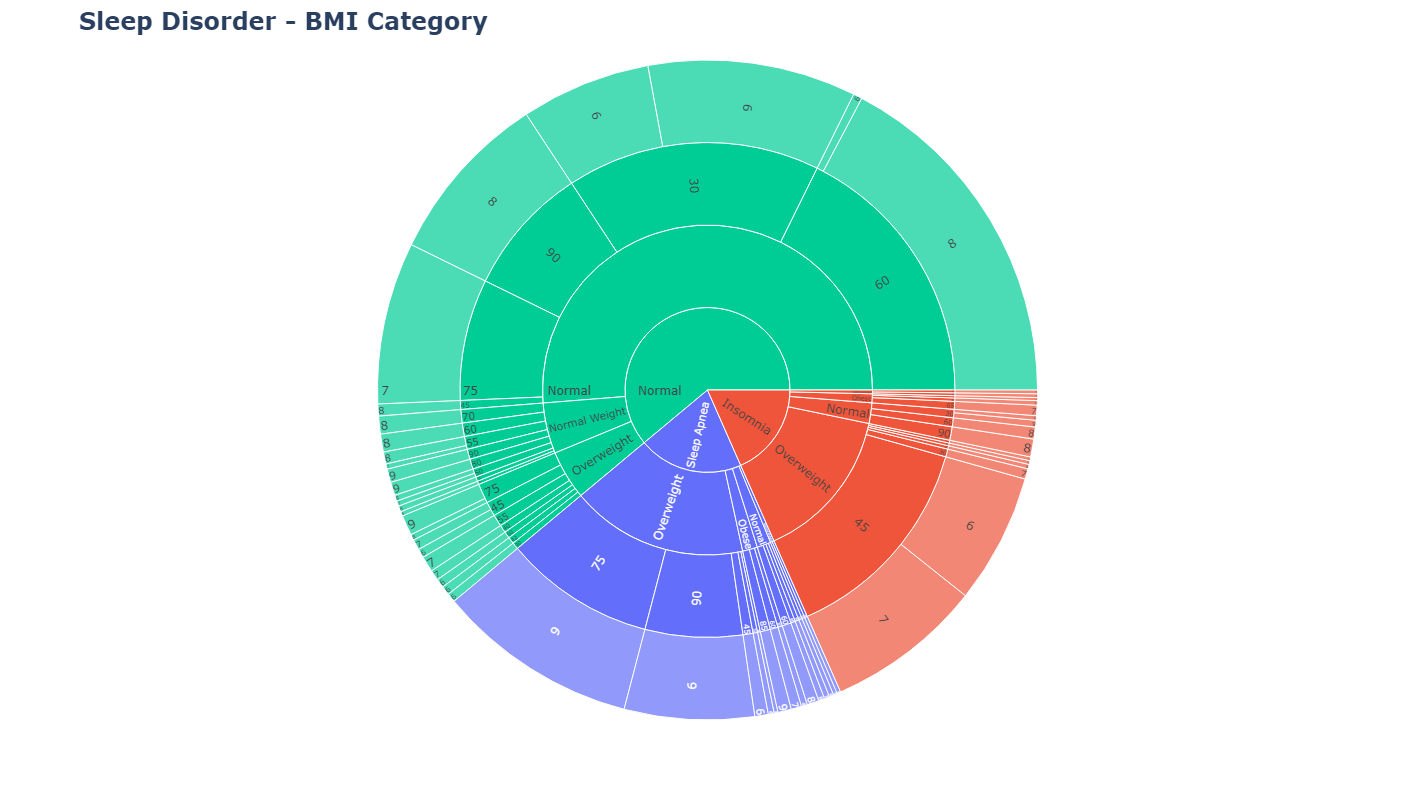

In [37]:
# Sunburst plot based on BMI Category
fig = px.sunburst(df, path=['Sleep_Disorder', 'BMI_Category', 'Physical_Activity_Level', 'Quality_of_Sleep'], color='Sleep_Disorder', values='Quality_of_Sleep')
fig.update_layout(title='<b> Sleep Disorder - BMI Category </b>', title_font={'size':24}, autosize=False, width=800, height=800)
fig.update_traces(insidetextorientation='radial')

fig.show()

### Observations:
The data analysis reveals the following key points:

1. **Demographics:**
   - The dataset comprises an almost equal distribution of male and female samples across 11 occupations and 4 BMI categories.
   - A higher percentage of males have normal sleep compared to females.

2. **Sleep Disorders:**
   - Females exhibit a higher prevalence of sleep apnea (36.22%) compared to males (5.82%).
   - Males show a higher prevalence of insomnia (21.69%) compared to females (19.46%).
   - Overweight and obese individuals are more likely to suffer from sleep disorders.

3. **Correlations:**
   - High correlations exist between high and low blood pressure, sleep duration and quality of sleep, as well as between physical activity level and daily steps.
   - Quality of sleep is highly uncorrelated with stress levels, sleep duration, and heart rate.

4. **Age and Gender Analysis:**
   - No male samples are present above 45 years of age.
   - More female samples are around 45 years of age.
   - Females sleep longer and generally have higher sleep quality.
   - Physical activity levels are similar between genders.
   - Females generally have higher sleep quality, longer sleep duration, and lower stress levels compared to males.
   - Females are more likely to have high blood pressure.

5. **Occupational Analysis:**
   - Doctors, nurses, and engineers sleep longer, while software engineers and teachers experience poor sleep quality.
   - Nurses often have high blood pressure and suffer from  Sleep Apnea, whereas sales representatives suffer from Insomnia.

6. **Health and Sleep Conditions:**
   - Normal BMI individuals generally have higher sleep quality.
   - Insomnia is prevalent around the age of 45.
   - Good sleep quality does not preclude individuals from experiencing insomnia or sleep apnea.
   - Sleep apnea is associated with high blood pressure.
   - Individuals with insomnia tend to have lower physical activity.
   - Obese individuals exhibit higher heart rate, stress levels, lower physical activity, poorer sleep quality, and shorter sleep duration.

7. **Outliers:**
   - Many outliers are observed in the distribution of males' heart rate.

8. **Target Distribution:**
   - The target distribution is imbalanced, with 58.56% normal sleep, 20.86% sleep apnea, and 20.59% insomnia samples.

9. **Occupational Sleep Patterns:**
   - Doctors, engineers, and lawyers predominantly have normal sleep, while nurses suffer from sleep apnea, and sales representatives experience insomnia.

##### Inference:
* Sleep Duration and Quality of sleep are highly co-related therefore we can drop one of them. Drop - Quality of Sleep
* Physical Activity Level and Daily Steps are highly co-related therefore we can drop on of them. Drop - Physical Activity Level
<br>
- __Input features__: Gender, Age, Occupation, Sleep_Duration, Stress_Level, BMI_Category, Heart_rate, Daily_Steps, Blood_Pressure_High and Blood_Pressure_Low
- __Classification output__: Normal, Sleep Apnea, Insomnia

### Process data based on Inference

In [38]:
# Drop Quality_of_Sleep column
df = df.drop('Quality_of_Sleep', axis=1)
# Drop Physical_Activity_Level column
df = df.drop('Physical_Activity_Level', axis=1)

In [39]:
df

Gender  Age            Occupation  Sleep_Duration  Stress_Level  \
0      Male   27     Software Engineer             6.1             6   
1      Male   28                Doctor             6.2             8   
2      Male   28                Doctor             6.2             8   
3      Male   28  Sales Representative             5.9             8   
4      Male   28  Sales Representative             5.9             8   
..      ...  ...                   ...             ...           ...   
369  Female   59                 Nurse             8.1             3   
370  Female   59                 Nurse             8.0             3   
371  Female   59                 Nurse             8.1             3   
372  Female   59                 Nurse             8.1             3   
373  Female   59                 Nurse             8.1             3   

    BMI_Category  Heart_Rate  Daily_Steps  Blood_Pressure_High  \
0     Overweight          77         4200                  126   
1         Normal          75        10000                  125   
2         Normal          75        10000                  125   
3          Obese          85         3000                  140   
4          Obese          85         3000                  140   
..           ...         ...          ...                  ...   
369   Overweight          68         7000                  140   
370   Overweight          68         7000                  140   
371   Overweight          68         7000                  140   
372   Overweight          68         7000                  140   
373   Overweight          68         7000                  140   

     Blood_Pressure_Low Sleep_Disorder  
0                    83         Normal  
1                    80         Normal  
2                    80         Normal  
3                    90    Sleep Apnea  
4                    90    Sleep Apnea  
..                  ...            ...  
369                  95    Sleep Apnea  
370                  95    Sleep Apnea  
371                  95    Sleep Apnea  
372                  95    Sleep Apnea  
373                  95    Sleep Apnea  

[374 rows x 11 columns]

### Label encode the categorical columns

In [41]:
import json
import joblib
from sklearn.preprocessing import LabelEncoder

label_map = {}
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Occupation', 'BMI_Category', 'Sleep_Disorder']

for col in categorical_cols:
    # Label encode categorical column
    df[col] = label_encoder.fit_transform(df[col])
    
    # Save the Label encoder
    joblib.dump(label_encoder, f"{col}_LabelEncoder.joblib", compress=9)
    
    # Get the label mapping
    encoder_mapping = dict(zip(label_encoder.classes_.tolist(), label_encoder.transform(label_encoder.classes_).tolist()))
    label_map[col] = encoder_mapping

print(label_map)
    
# Save the label mapping    
with open("label_map.json", 'w') as f:
    json.dump(label_map, f)

{'Gender': {'Female': 0, 'Male': 1}, 'Occupation': {'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}, 'BMI_Category': {'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}, 'Sleep_Disorder': {'Insomnia': 0, 'Normal': 1, 'Sleep Apnea': 2}}


### Save the schema of the data

In [40]:
# Save the min max schema of the dataframe
overview = df.describe()
overview.loc[["min", "max"]].to_json("schema_data.json")

### Encoding and decoding examples of Label encoder